# timeseries_fastai
>This repository aims to implement TimeSeries classification/regression algorithms. It makes extensive use of fastai V2!

You can find the documentation [here](https://tcapelle.github.io/timeseries_fastai/)

## Installation

You will need to install fastai V2 from [here](https://github.com/fastai/fastai2) and then you can do from within the environment where you installed fastai V2:

```bash
pip install timeseries_fastai
```

and you are good to go.

### TL;DR
```bash
git clone https://github.com/fastai/fastai2
cd fastai2
conda env create -f environment.yml
source activate fastai2
pip install fastai2 timeseries_fastai

```

## Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline
The original paper repo is [here](https://github.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline) is implemented in Keras/Tf.

- Notebook 01: This is a basic notebook that implements the Deep Learning models proposed in [Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline](https://arxiv.org/abs/1611.06455). 

## InceptionTime: Finding AlexNet for Time SeriesClassification
The original paper repo is [here](https://github.com/hfawaz/InceptionTime)

- Notebook 02: Added InceptionTime architecture from [InceptionTime: Finding AlexNet for Time SeriesClassification](https://arxiv.org/pdf/1909.04939.pdf). 

## Results

You can run the benchmark using:

`$python ucr.py --arch='inception' --tasks='all' --filename='inception.csv' --mixup=0.2`

### Default Values:
- `lr` = 1e-3
- `opt` = 'ranger'
- `epochs` = 40
- `fp16` = True

In [ ]:
import pandas as pd
from pathlib import Path

In [ ]:
results_inception = pd.read_csv(Path.cwd().parent/'inception.csv', index_col=0)
results_inception.head(10)

,acc,acc_max,train_loss,val_loss
task,,,,
Adiac,0.83,0.83,1.54,1.31
ArrowHead,0.84,0.89,0.47,0.60
Beef,0.57,0.60,1.22,1.27
BeetleFly,0.85,1.00,0.29,0.38
BirdChicken,0.80,0.95,0.25,0.55
Car,0.85,0.85,0.58,0.74
CBF,0.99,1.00,0.44,0.37
ChlorineConcentration,0.77,0.77,0.61,0.70
CinCECGTorso,0.65,0.68,0.64,1.06


## Getting Started

In [ ]:
from timeseries_fastai.imports import *
from timeseries_fastai.core import *
from timeseries_fastai.data import *
from timeseries_fastai.models import *

In [ ]:
ucr_path = untar_data(URLs.UCR)

In [ ]:
df_train, df_test = load_df_ucr(ucr_path, 'StarLightCurves')

Loading files from: /home/tc256760/.fastai/data/Univariate2018_arff/StarLightCurves


In [ ]:
x_cols = df_train.columns[0:-2].to_list()

In [ ]:
dls = TSDataLoaders.from_dfs(df_train, df_test, x_cols=x_cols, label_col='target', bs=16)

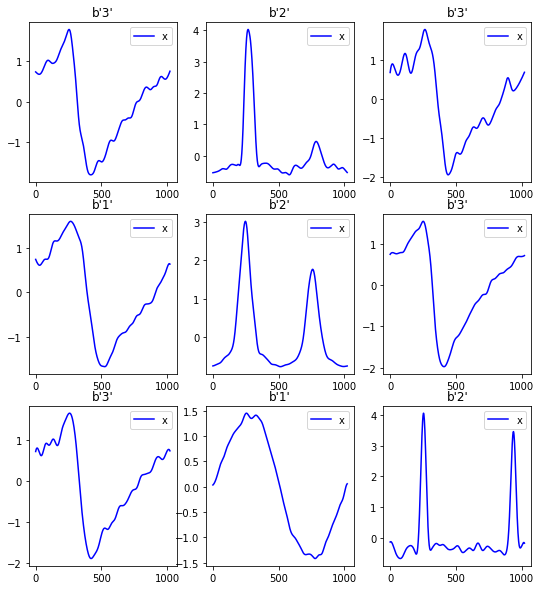

In [ ]:
dls.show_batch()

In [ ]:
inception = create_inception(1, len(dls.vocab))

In [ ]:
learn = Learner(dls, inception, metrics=[accuracy])

In [ ]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.346502,1.069310,0.855270,00:15
1,0.253006,0.180050,0.940748,00:15
2,0.187220,0.450394,0.787033,00:15
3,0.160097,0.117180,0.969767,00:15
4,0.119194,0.105545,0.970253,00:15


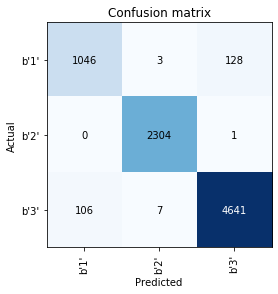

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Export -

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_models.ipynb.
Converted 99_index.ipynb.
